### 1- Loading Data & Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("ride_sharing_new.csv")

### Show Sample Of Data

In [6]:
data.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [7]:
data.tail()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
25755,25755,11 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5063,1,2000,Male
25756,25756,10 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5411,2,1998,Male
25757,25757,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),5157,2,1995,Male
25758,25758,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),4438,2,1995,Male
25759,25759,29 minutes,16,Steuart St at Market St,115,Jackson Playground,1705,3,1990,Male


In [8]:
data.shape

(25760, 10)

### Show More Info :

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB


In [10]:
data.describe()

,Unnamed: 0,station_A_id,station_B_id,bike_id,user_type,user_birth_year
count,25760.000000,25760.000000,25760.000000,25760.000000,25760.000000,25760.000000
mean,12879.500000,31.023602,89.558579,4107.621467,2.008385,1983.054969
std,7436.415803,26.409263,105.144103,1576.315767,0.704541,10.010992
min,0.000000,3.000000,3.000000,11.000000,1.000000,1901.000000
25%,6439.750000,15.000000,21.000000,3106.000000,2.000000,1978.000000
50%,12879.500000,21.000000,58.000000,4821.000000,2.000000,1985.000000
75%,19319.250000,67.000000,93.000000,5257.000000,3.000000,1990.000000
max,25759.000000,81.000000,383.000000,6638.000000,3.000000,2001.000000


In [11]:
data.duplicated().any()

False

### Above cells' conclusion
- Dataset has no `missing values`
- Dataset has no `complete duplicates`
- We remove `Unnamed: 0`
- We remove `minutes` word from `duration` column
- `user_birth_year` column has some invalid values
- We must change some `columns` datatypes
- Dataset has `25760` rows and `9` columns

### Cleaning

In [12]:
# remove Unnamed: 0 column 
data.drop(columns = ["Unnamed: 0"], inplace = True)  

In [13]:
# discovering duration column

data["duration"] = data["duration"].str.strip("minutes") # remove minutes word 
data["duration"] = data["duration"].astype("int") # convert duration column from object to integer

In [14]:
# git max and min duration from A to B

max_duration, mim_duration = data["duration"].max(), data["duration"].min()
print(f"Maximum is {max_duration}, minimum is {mim_duration}")

Maximum is 1372, minimum is 1


#### The largest distance between the station `A` and station `B` 
- duration `1372` minutes

#### The smallest distance between the station `A` and station `B` 
- duration `1` minutes

#### The most common duration between the station `A` and station `B`
- duration `7` minutes
- Count is `2322`



In [41]:
# replace duration column with nan value where start, end station same

for index in range(data.shape[0]):
    if (data["station_A_id"][index]) == (data["station_B_id"][index]):
        data["duration"][index] = np.nan

# replace nan value with max 
data["duration"].fillna(max_duration, inplace = True) 

In [16]:
# convert type of column to integer

data["duration"] = data["duration"].astype(int)

### Above cells' conclusion
- We replace `duration column` with `Nan value` if `station_A_id`, `station_B_id` same
- We replace `Nan value` with `max value` 
- We convert `datatype` to `integer`

In [17]:
# discovering station_A_id column

data["station_A_id"].isna().sum() # Check nan values

0

In [18]:
# output values count

data["station_A_id"].value_counts()

67    3635
81    3030
21    2998
30    2933
3     2899
15    2812
22    2561
16    2506
5     2386
Name: station_A_id, dtype: int64

### From the above, we have noticed that

#### 1- We have `9` station people start with

#### 2- The `most` common sation people start with
- station id is `67`
- number of bike is `3635`

#### 3- The `lowest` common sation people start with
- station id is `5`
- number of bike is `2386`

#### 4- We have `zero` nan value



In [19]:
# discovering station_B_id column

data["station_B_id"].isna().sum() # Check nan values

0

In [20]:
# output values count

data["station_B_id"].value_counts()

6      1036
30      922
15      880
58      839
50      768
       ... 
138       7
362       3
359       3
54        2
140       1
Name: station_B_id, Length: 152, dtype: int64

### From the above, we have noticed that

#### 1- We have `152` station people finish with

#### 2- The `most` common sation people finish with
- station id is `6`
- number of bike is `1036`

#### 3- The `lowest` common sation people finish with
- station id is `140`
- number of bike is `1`

#### 4- We have `zero` nan value

In [21]:
# discovering bike_id column

data["bike_id"].isna().sum()

0

In [22]:
# output values count

data["bike_id"].value_counts()

4848    58
5019    50
5409    48
5082    48
5020    46
        ..
1456     1
2012     1
1533     1
527      1
5259     1
Name: bike_id, Length: 1805, dtype: int64

In [23]:
# How many bike participatory 

len(data["bike_id"].unique())

1805

In [24]:
# Bike id of the most used 

bikeId = data['bike_id'].mode()[0]
bikeId

4848

In [25]:
# duration of bike that most used 

bikeMostUsed = data[data["bike_id"] == bikeId]
bikeMostUsed[["duration"]].describe()

,duration
count,58.000000
mean,31.655172
std,179.110429
min,2.000000
25%,6.000000
50%,8.000000
75%,11.000000
max,1372.000000


### From the above, we have noticed that

#### 1- We have `1805` bikes  participation

#### 2- The `most` common bike participation
- bike id is `4848`
- number of participation is `58`

#### 3- The `lowest` common bike participation
- many bikes
- number of participation is `1`

#### 4- We have `zero` nan value


In [26]:
# discovering user_type column

data["user_type"].isna().sum()

0

In [27]:
# output unique value

data["user_type"].unique()

array([2, 3, 1], dtype=int64)

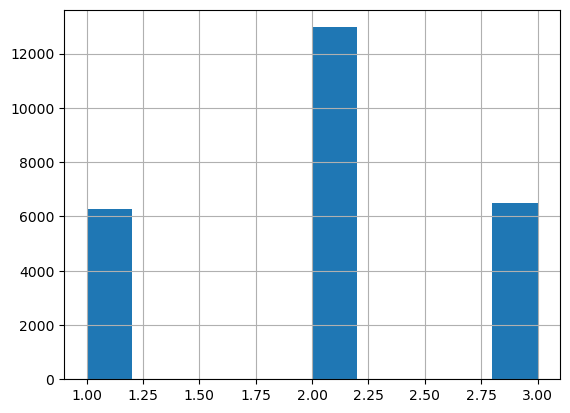

In [28]:
data["user_type"].hist()
plt.show()

### From the above, we have noticed that

#### 1-  We have `1` `2` `3` values
- 1 `mean have a annual subscription`
- 2 `mean have a monthly subscription`
- 3 `mean have a daily subscription`

#### 2- The `most` common subscription
- `monthly` subscription
- number of people is greater than `12000`

#### 3- The `lowest` common subscription
- `annual` subscription
- number of people is greater than `6000`

#### 4- We have `zero` nan value

In [29]:
# discovering user_birth_year column

age = data["user_birth_year"].unique().tolist() # create list of unique birth year

In [30]:
# check nan value

data["user_birth_year"].isna().sum()

0

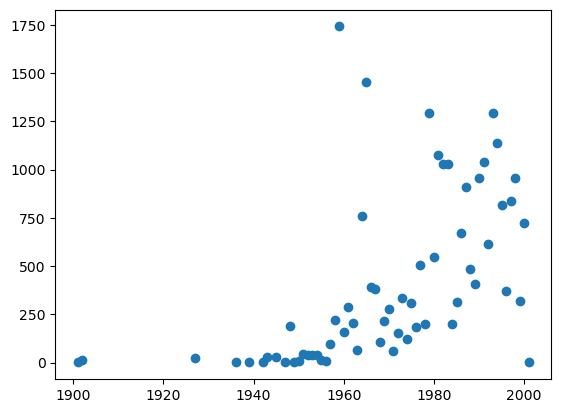

In [31]:
# discovering outliers

plt.scatter(x= data["user_birth_year"].unique(), y= data["user_birth_year"].value_counts()) # show outliers
plt.show()


In [32]:
# Calculating outliers

age.sort()
Q1,Q2,Q3 = 1978.000000, 1985.000000, 1990.000000
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

# replace outliers values with nan
data.loc[(data["user_birth_year"] > upper) | (data["user_birth_year"] < lower), "user_birth_year"] = np.nan

In [33]:
# replace nan value with mean

mean = data["user_birth_year"].mean()
data["user_birth_year"].fillna(mean, inplace = True)

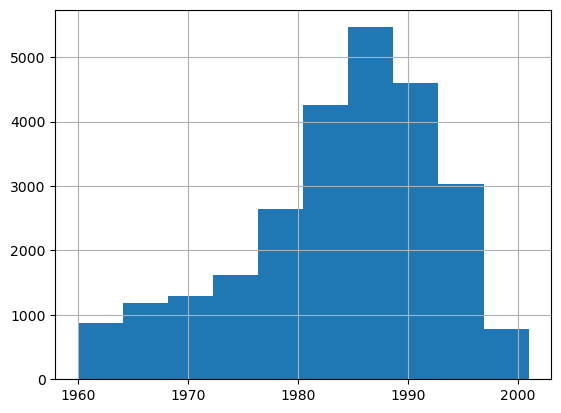

In [34]:
# show distribution 

data["user_birth_year"].hist()
plt.show()

### From the above, we have noticed that

#### `user_birth_year` need some modifications
- We need to rplace `outliers` with mean value
- We will Calculating `outliers`
- we Will replace `outliers` values with `np.nan`

#### Most `user_birth_year` between `1980` and `1995`

In [35]:
data["user_birth_year"].mean()

1983.8082726223176

In [36]:
# discovering user_gender column

data["user_gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [37]:
# check nan value

data["user_gender"].isna().sum()

0

In [38]:
# output values count

data["user_gender"].value_counts()

Male      19382
Female     6027
Other       351
Name: user_gender, dtype: int64

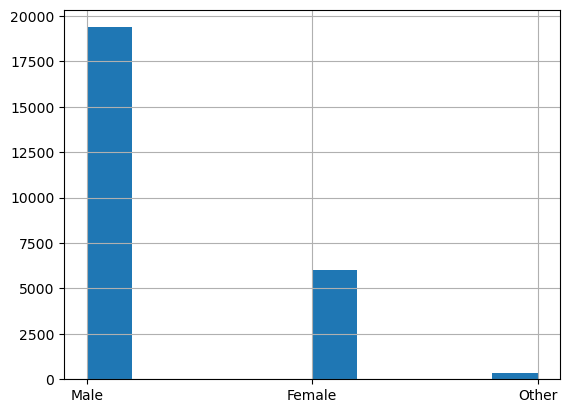

In [39]:
data["user_gender"].hist()
plt.show()

### From the above, we have noticed that

#### 1-  We have `Male`, `Female`, `Other`  values

#### 2- The `most` common gender
- `Male` gender
- number of male is `19382`

#### 3- The `lowest` common gender
- `Other` gender
- number of other gender is `351`

#### 4- We have `zero` nan value